<a href="https://colab.research.google.com/github/jorgetstechnology/financas/blob/master/portifolio_de_a%C3%A7%C3%B5es_e_calculo_da_TR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAXA DE RETORNO DE PORTIFÓLIO**

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt

In [0]:
tickers = ['PG', 'MSFT', 'F', 'GE']#Carteiras do portifólio 
mydata = pd.DataFrame()
for t in tickers:
  mydata[t] = wb.DataReader(t, data_source = 'yahoo', start= '1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6299 entries, 1995-01-03 to 2020-01-08
Data columns (total 4 columns):
PG      6299 non-null float64
MSFT    6299 non-null float64
F       6299 non-null float64
GE      6299 non-null float64
dtypes: float64(4)
memory usage: 246.1 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.400181,2.420130,4.454672,2.731941
1995-01-04,6.348878,2.437722,4.574527,2.731941
1995-01-05,6.259093,2.397512,4.534577,2.738635
1995-01-06,6.271922,2.437722,4.534577,2.725244
1995-01-09,6.246270,2.422644,4.614479,2.698461


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-01-02,123.410004,160.619995,9.420,11.930
2020-01-03,122.580002,158.619995,9.210,11.970
2020-01-06,122.750000,159.029999,9.160,12.140
2020-01-07,121.989998,157.580002,9.250,12.050
2020-01-08,123.000000,160.615005,9.275,12.005


In [6]:
mydata.describe()

,PG,MSFT,F,GE
count,6299.000000,6299.000000,6299.000000,6299.000000
mean,44.655241,31.407777,8.859070,16.663158
std,25.488987,28.901666,3.473832,6.403716
min,6.246270,2.372381,0.868647,2.691765
25%,24.118107,17.379492,5.877361,11.697789
50%,41.739922,21.473824,8.852555,17.262123
75%,64.792866,32.134893,10.910208,21.296482
max,126.089996,160.619995,19.250069,31.040545


### **NORMALIZA PARA BASE 100**
## P1/P0 * **100** 

In [7]:
mydata.iloc[0]#EXTRAI DADOS DA 1º COL DA TABELA

PG      6.400181
MSFT    2.420130
F       4.454672
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

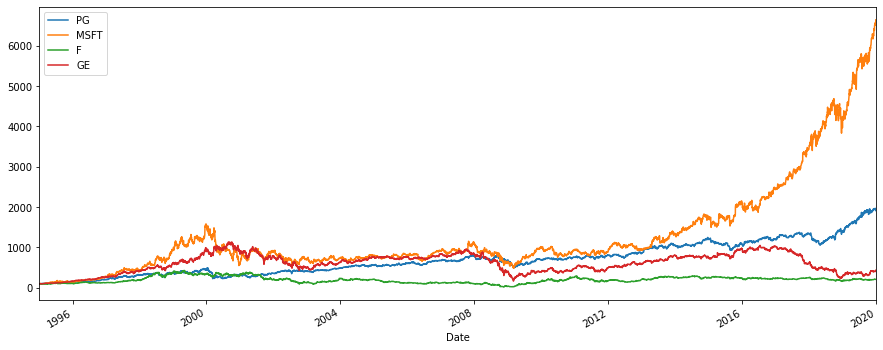

In [8]:
(mydata/mydata.iloc[0] * 100).plot(figsize = (15, 6));#Fórmula da normalização base 100
plt.show()

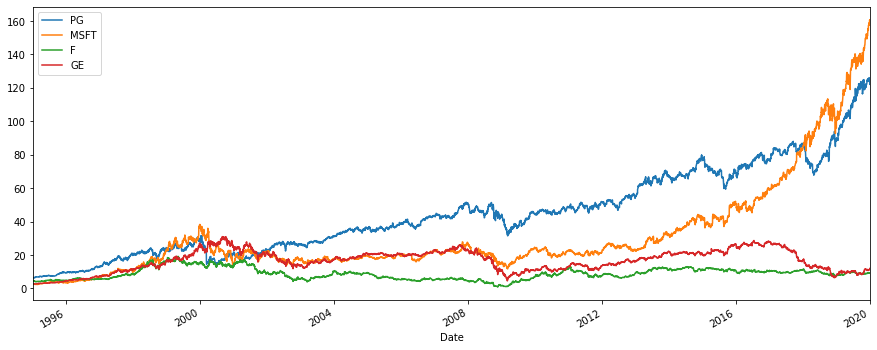

In [9]:
mydata.plot(figsize = (15, 6))
plt.show()

In [10]:
mydata.loc['1995-01-03']

PG      6.400181
MSFT    2.420130
F       4.454672
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

In [11]:
mydata.iloc[0]

PG      6.400181
MSFT    2.420130
F       4.454672
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

### Calculando o Retorn Simples das Ações

In [18]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002450
1995-01-06,0.002050,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [0]:
weights = np.array([0.25, 0.25, 0.25, 0.25])#assumondo pesos iguais

In [21]:
np.dot(returns, weights)#calculo de produto de cada ação pelo seu retorno

array([        nan,  0.00653965, -0.00922981, ...,  0.00318623,
       -0.00322435,  0.00662692])

In [24]:
annual_returns = returns.mean() * 250
annual_returns #retorno esperado anualmente

PG      0.141937
MSFT    0.214675
F       0.105530
GE      0.104459
dtype: float64

In [25]:
np.dot(annual_returns, weights)

0.14165016650434717

In [27]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'#armazena o valor com 3 casas após a ','
pfolio_1

'14.165%'

In [0]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])


In [33]:
pfolio_2 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'#armazena o valor com 3 casas após a ','
print(pfolio_1)
print(pfolio_2)

14.165%
14.165%
